In [1]:
#load the magic
import matplotlib.pyplot as plt 
%matplotlib inline

import sys
import datacube.utils.rio
import datacube

sys.path.append("../Scripts")
from deafrica_datahandling import load_ard
from deafrica_plotting import rgb
from deafrica_plotting import display_map
from odc.algo import xr_geomedian

#This will speed up loading data
datacube.utils.rio.set_default_rio_config(aws='auto', cloud_defaults=True)

In [2]:
dc = datacube.Datacube(app="geomedian_composite")

In [3]:
x = (-1.15, -1.19)
y = (5.14, 5.18)

display_map(x, y)

In [4]:
#Create a reusable query
query = {
    'x': (-1.15, -1.19),
    'y': (5.14, 5.18),
    'time': ("2018-02-01", "2018-03-15"),
    'measurements': ['red', 'green', 'blue'],
    'group_by': 'solar_day',
    'output_crs' : 'epsg:6933',
}

In [9]:
sentinel2_ds = load_ard(dc=dc,
                        products=["s2_l2a"],
                        #output_crs="EPSG:6933",
                        resolution=(-10,10),
                        #min_goodata=0.7,
                       **query)

Using pixel quality parameters for Sentinel 2
Finding datasets
    s2_l2a
Applying pixel quality/cloud mask
Loading 9 time steps


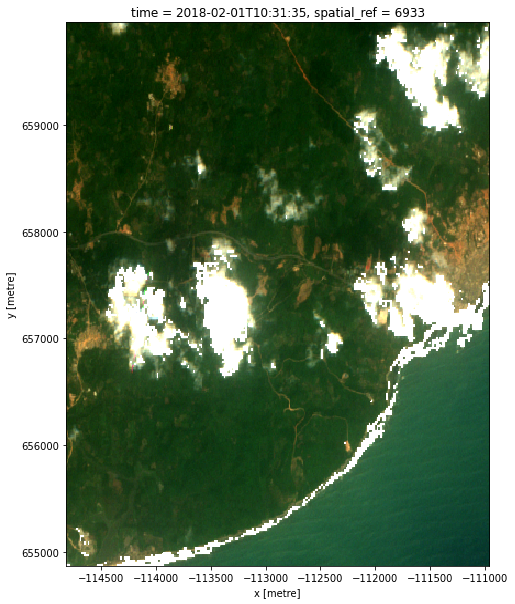

In [10]:
rgb(sentinel2_ds, bands=['red', 'green', 'blue'],
   index=0, size=10)

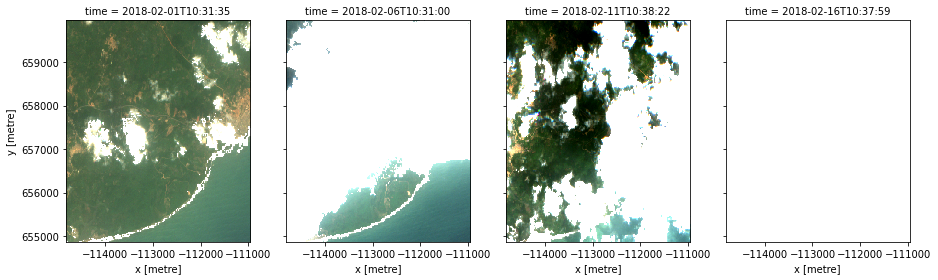

In [11]:
rgb(sentinel2_ds, bands=['red', 'green', 'blue'],
   index=[0,1,2,3], size=4)

In [12]:
geomedian_composite = xr_geomedian(sentinel2_ds)

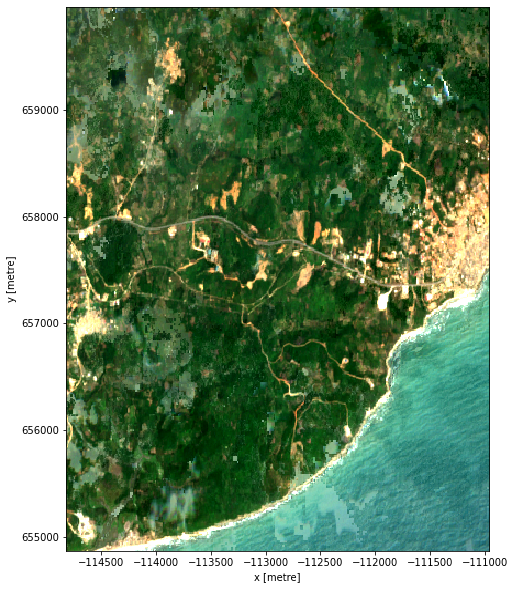

In [13]:
rgb(geomedian_composite, bands=['red', 'green', 'blue'], size=10)

In [ ]:
#Session 3 Quiz

In [14]:
# Create a reusable query
q1 = {
    'x': (30.27, 30.31),
    'y': (-19.01, -19.05),
    'time': ('2017-11-01', '2018-01-31'),
    'measurements': ['red', 'green', 'blue'],
    'output_crs' : 'epsg:6933',
    'group_by': 'solar_day'
}

q2 = {
    'x': (30.27, 30.31),
    'y': (-19.01, -19.05),
    'time': ('2019-06-01', '2019-08-31'),
    'measurements': ['red', 'green', 'blue'],
    'output_crs' : 'epsg:6933',
    'group_by': 'solar_day'
}

In [16]:
# Load available data from both S2 datasets
ds_1 = load_ard(dc=dc,
                products=["s2_l2a"],
                resolution=(-10, 10),
                min_gooddata=0.7,
                **q1)

# Print output data
print(ds_1)

Using pixel quality parameters for Sentinel 2
Finding datasets
    s2_l2a
Counting good quality pixels for each time step
Filtering to 9 out of 17 time steps with at least 70.0% good quality pixels
Applying pixel quality/cloud mask
Loading 9 time steps
<xarray.Dataset>
Dimensions:      (time: 9, x: 387, y: 484)
Coordinates:
  * x            (x) float64 2.921e+06 2.921e+06 ... 2.924e+06 2.924e+06
  * y            (y) float64 -2.382e+06 -2.382e+06 ... -2.387e+06 -2.387e+06
  * time         (time) datetime64[ns] 2017-11-03T08:03:10 ... 2018-01-27T08:...
    spatial_ref  int32 6933
Data variables:
    red          (time, y, x) float32 1420.0 1354.0 1336.0 ... 1302.0 1438.0
    green        (time, y, x) float32 1012.0 1040.0 1028.0 ... 1218.0 1222.0
    blue         (time, y, x) float32 797.0 771.0 753.0 ... 902.0 908.0 957.0
Attributes:
    crs:           epsg:6933
    grid_mapping:  spatial_ref


In [17]:
geomedian_composite1 = xr_geomedian(ds_1)

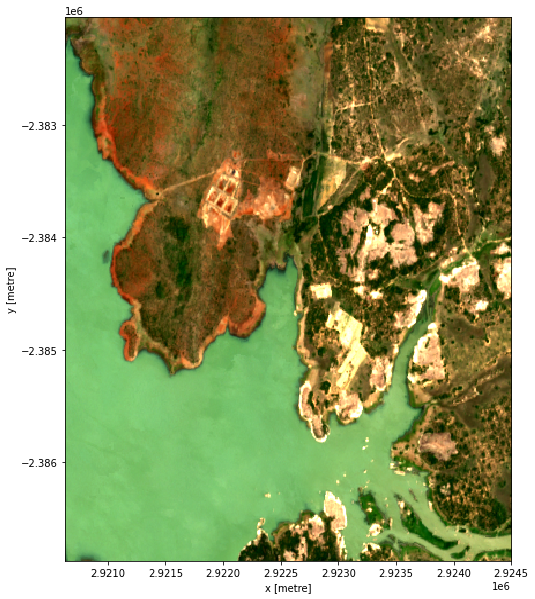

In [18]:
rgb(geomedian_composite1, bands=['red', 'green', 'blue'], size=10)

In [19]:
# Load available data from both S2 datasets
ds_2 = load_ard(dc=dc,
                #products=['s2a_msil2a', 's2b_msil2a'],
                products=['s2_l2a'],
                resolution=(-10, 10),
                min_gooddata=0.7,
                **q2)

# Print output data
print(ds_2)

Using pixel quality parameters for Sentinel 2
Finding datasets
    s2_l2a
Counting good quality pixels for each time step
Filtering to 14 out of 19 time steps with at least 70.0% good quality pixels
Applying pixel quality/cloud mask
Loading 14 time steps
<xarray.Dataset>
Dimensions:      (time: 14, x: 387, y: 484)
Coordinates:
  * x            (x) float64 2.921e+06 2.921e+06 ... 2.924e+06 2.924e+06
  * y            (y) float64 -2.382e+06 -2.382e+06 ... -2.387e+06 -2.387e+06
  * time         (time) datetime64[ns] 2019-06-01T08:15:20 ... 2019-08-30T08:...
    spatial_ref  int32 6933
Data variables:
    red          (time, y, x) float32 1224.0 1130.0 1236.0 ... 1350.0 1350.0
    green        (time, y, x) float32 856.0 880.0 910.0 ... 905.0 982.0 991.0
    blue         (time, y, x) float32 655.0 636.0 624.0 ... 686.0 741.0 729.0
Attributes:
    crs:           epsg:6933
    grid_mapping:  spatial_ref


In [22]:
geomedian_composite2 = xr_geomedian(ds_2)

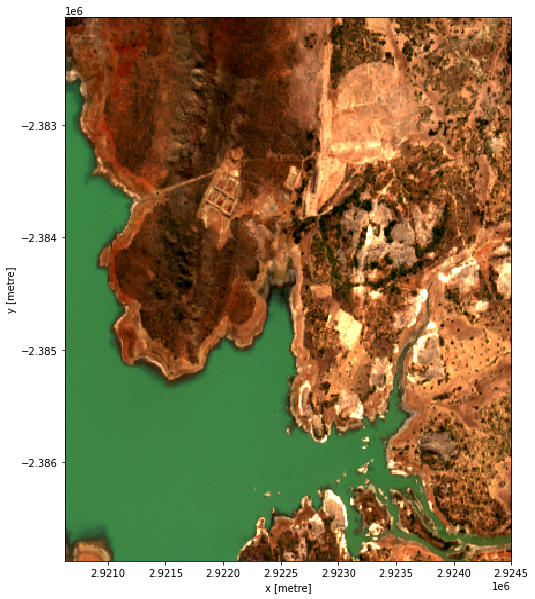

In [23]:
rgb(geomedian_composite2, bands=['red', 'green', 'blue'], size=10)